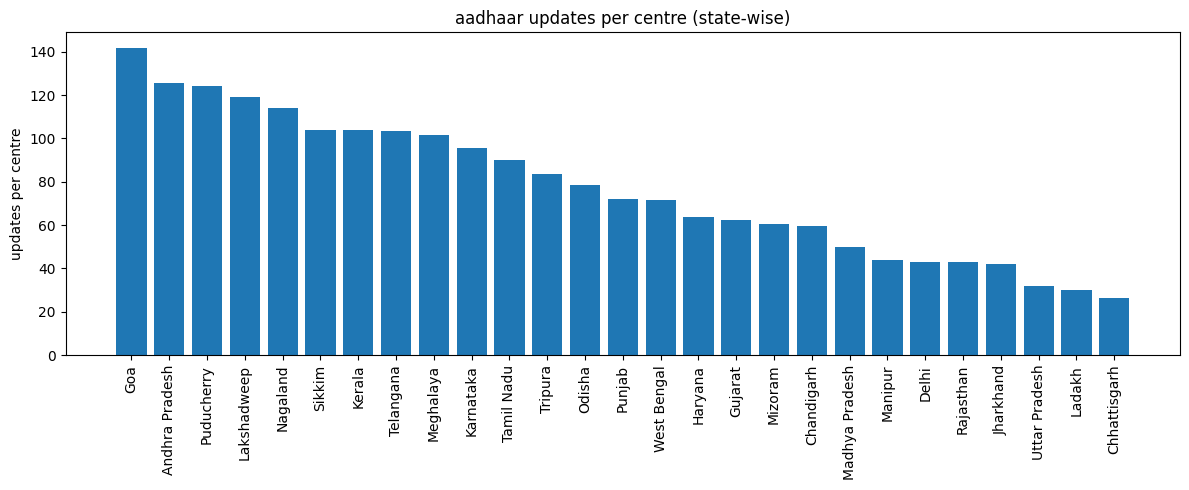

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

demo=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
bio=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

updates=pd.concat([demo,bio]).groupby("state").size().reset_index(name="total_updates")

centres=pd.read_csv("../sql/data/Aadhar.csv")
centres=centres.rename(columns={"State":"state","No. of centres":"centres"})
centres["centres"]=pd.to_numeric(centres["centres"],errors="coerce")

df=updates.merge(centres,on="state",how="inner")
df["updates_per_centre"]=df["total_updates"]/df["centres"]
df=df.sort_values("updates_per_centre",ascending=False)

plt.figure(figsize=(12,5))
plt.bar(df["state"],df["updates_per_centre"])
plt.xticks(rotation=90)
plt.ylabel("updates per centre")
plt.title("aadhaar updates per centre (state-wise)")
plt.tight_layout()
plt.show()
